# ПРОЕКТ "Активность R"

### Задача ПРОЕКТА:

Проанализировать активность риелторов и выделить портреты риелторов по задаточной активности.

<div class="alert alert-info">
 
### Оглавление: <a id = 'section1'></a>
    
#### [1. ОПИСАНИЕ И ЗАГРУЗКА ДАННЫХ](#step1)   
    
#### [2. ПРЕДОБРАБОТКА ДАННЫХ](#step2)     
    
#### [3. ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ (EDA)](#step3)  

#### [4. КЛАСТЕРИЗАЦИЯ РИЕЛТОРОВ](#step4)           

</div>

## Шаг 1. ОПИСАНИЕ И ЗАГРУЗКА ДАННЫХ <a id="step1"></a>

Датасет содержит данные об активности риелторов за ноябрь 2020 - февраль 2021 (срез на 19.02.2021)

In [1]:
#импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import dates
import numpy as np
import scipy.stats as stats
import datetime as dt
import seaborn as sns

In [2]:
r = pd.read_excel('C:\\Этажи\\свод.xlsx')

<a href = '#section1'>Вернуться к оглавлению</a>

## Шаг 2. ПРЕДОБРАБОТКА ДАННЫХ <a id="step2"></a>

замена пропущенных значений на 0

In [3]:
#просмотр данных таблицы
print(r.shape)
print()
print(r.info())
print()
print('Количество дубликатов в таблице:', r.duplicated().sum())
print()
print('Первые 5 строк датасета:')
display(r.head(5))

(9086, 44)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9086 entries, 0 to 9085
Data columns (total 44 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Код Риелтора                         9086 non-null   int64  
 1   ФИО риелтора                         9086 non-null   object 
 2   город                                9086 non-null   object 
 3   стаж                                 0 non-null      float64
 4   МОП                                  8755 non-null   object 
 5   Заходы в РИЭС нояб. 2020             8848 non-null   float64
 6   Заходы в РИЭС дек. 2020              8987 non-null   float64
 7   Заходы в РИЭС янв. 2021              9028 non-null   float64
 8   Заходы в РИЭС февр. 2021             8988 non-null   float64
 9   Заходы в РИЭС среднее н-ф            9086 non-null   float64
 10  ВП дек. 2020                         8606 non-null   float64
 11  ВП янв. 2021      

,Код Риелтора,ФИО риелтора,город,стаж,МОП,Заходы в РИЭС нояб. 2020,Заходы в РИЭС дек. 2020,Заходы в РИЭС янв. 2021,Заходы в РИЭС февр. 2021,Заходы в РИЭС среднее н-ф,...,Затраты на рекламу февр. 2021,Затраты на рекламу среднее н-ф,Изменение цены объектов нояб. 2020,Изменение цены объектов дек. 2020,Изменение цены объектов янв. 2021,Изменение цены объектов февр. 2021,Изменение цены объектов среднее н-ф,Кол-во задатков февр. 2021,Кластер R по задаткам,ТОП
0,1232,Кремлев Владислав Юрьевич,Тюмень,NaN,Шарипов Фаниль Асхатович,155.0,111.0,139.0,104.0,127.25,...,0,243.75,22.0,20.0,11.0,10.0,15.75,22,№4: более 8,1
1,18930,Пушкина Виктория Ивановна,Тюмень,NaN,Фаттахов Артур Альбертович,0.0,0.0,0.0,0.0,0.00,...,6488,4318.75,4.0,25.0,21.0,8.0,14.50,21,№4: более 8,1
2,14272,Ишкиев Ильнур Ильшатович,Тюмень,NaN,Ишкиев Ильнур Ильшатович,200.0,210.0,170.0,132.0,178.00,...,4832,4596.00,20.0,12.0,26.0,11.0,17.25,16,№4: более 8,1
3,14888,Третьякова Екатерина Петровна,Тюмень,NaN,Каримова Ильсеяр Равильевна,0.0,0.0,0.0,0.0,0.00,...,1611,2039.00,3.0,9.0,8.0,5.0,6.25,15,№4: более 8,1
4,22415,Замошникова Ольга Петровна,Нижний Тагил,NaN,Осинняя Татьяна Александровна,105.0,106.0,98.0,76.0,96.25,...,6810,7267.50,16.0,8.0,36.0,4.0,16.00,15,№4: более 8,1


In [5]:
#выведем названия столбцов для дальнейшего использования
print(r.columns)

Index(['Код Риелтора', 'ФИО риелтора', 'город', 'стаж', 'МОП',
       'Заходы в РИЭС нояб. 2020', 'Заходы в РИЭС дек. 2020',
       'Заходы в РИЭС янв. 2021', 'Заходы в РИЭС февр. 2021',
       'Заходы в РИЭС среднее н-ф', 'ВП дек. 2020', 'ВП янв. 2021',
       'ВП февр. 2021', 'ВП среднее д-ф', 'Подборки дек. 2020',
       'Подборки янв. 2021', 'Подборки февр. 2021', 'Подборки среднее д-ф',
       'Показы дек. 2020', 'Показы янв. 2021', 'Показы февр. 2021',
       'Показы среднее д-ф', 'Ипотечная консультация дек. 2020',
       'Ипотечная консультация янв. 2021', 'Ипотечная консультация февр. 2021',
       'Ипотечная консультация среднее д-ф', 'Набор базы нояб. 2020',
       'Набор базы дек. 2020', 'Набор базы янв. 2021', 'Набор базы февр. 2021',
       'Набор базы среднее н-ф', 'Затраты на рекламу нояб. 2020',
       'Затраты на рекламу дек. 2020', 'Затраты на рекламу янв. 2021',
       'Затраты на рекламу февр. 2021', 'Затраты на рекламу среднее н-ф',
       'Изменение цены объектов

In [6]:
#отработаем пропущенные значения (кроме стажа) - заменим на 0
r[['МОП',
       'Заходы в РИЭС нояб. 2020', 'Заходы в РИЭС дек. 2020',
       'Заходы в РИЭС янв. 2021', 'Заходы в РИЭС февр. 2021',
       'Заходы в РИЭС среднее н-ф', 'ВП дек. 2020', 'ВП янв. 2021',
       'ВП февр. 2021', 'ВП среднее д-ф', 'Подборки дек. 2020',
       'Подборки янв. 2021', 'Подборки февр. 2021', 'Подборки среднее д-ф',
       'Показы дек. 2020', 'Показы янв. 2021', 'Показы февр. 2021',
       'Показы среднее д-ф', 'Ипотечная консультация дек. 2020',
       'Ипотечная консультация янв. 2021', 'Ипотечная консультация февр. 2021',
       'Ипотечная консультация среднее д-ф', 'Набор базы нояб. 2020',
       'Набор базы дек. 2020', 'Набор базы янв. 2021', 'Набор базы февр. 2021',
       'Набор базы среднее н-ф', 'Затраты на рекламу нояб. 2020',
       'Затраты на рекламу дек. 2020', 'Затраты на рекламу янв. 2021',
       'Затраты на рекламу февр. 2021', 'Затраты на рекламу среднее н-ф',
       'Изменение цены объектов нояб. 2020',
       'Изменение цены объектов дек. 2020',
       'Изменение цены объектов янв. 2021',
       'Изменение цены объектов февр. 2021',
       'Изменение цены объектов среднее н-ф']] = r[['МОП',
       'Заходы в РИЭС нояб. 2020', 'Заходы в РИЭС дек. 2020',
       'Заходы в РИЭС янв. 2021', 'Заходы в РИЭС февр. 2021',
       'Заходы в РИЭС среднее н-ф', 'ВП дек. 2020', 'ВП янв. 2021',
       'ВП февр. 2021', 'ВП среднее д-ф', 'Подборки дек. 2020',
       'Подборки янв. 2021', 'Подборки февр. 2021', 'Подборки среднее д-ф',
       'Показы дек. 2020', 'Показы янв. 2021', 'Показы февр. 2021',
       'Показы среднее д-ф', 'Ипотечная консультация дек. 2020',
       'Ипотечная консультация янв. 2021', 'Ипотечная консультация февр. 2021',
       'Ипотечная консультация среднее д-ф', 'Набор базы нояб. 2020',
       'Набор базы дек. 2020', 'Набор базы янв. 2021', 'Набор базы февр. 2021',
       'Набор базы среднее н-ф', 'Затраты на рекламу нояб. 2020',
       'Затраты на рекламу дек. 2020', 'Затраты на рекламу янв. 2021',
       'Затраты на рекламу февр. 2021', 'Затраты на рекламу среднее н-ф',
       'Изменение цены объектов нояб. 2020',
       'Изменение цены объектов дек. 2020',
       'Изменение цены объектов янв. 2021',
       'Изменение цены объектов февр. 2021',
       'Изменение цены объектов среднее н-ф']].fillna(0)
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9086 entries, 0 to 9085
Data columns (total 44 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Код Риелтора                         9086 non-null   int64  
 1   ФИО риелтора                         9086 non-null   object 
 2   город                                9086 non-null   object 
 3   стаж                                 0 non-null      float64
 4   МОП                                  9086 non-null   object 
 5   Заходы в РИЭС нояб. 2020             9086 non-null   float64
 6   Заходы в РИЭС дек. 2020              9086 non-null   float64
 7   Заходы в РИЭС янв. 2021              9086 non-null   float64
 8   Заходы в РИЭС февр. 2021             9086 non-null   float64
 9   Заходы в РИЭС среднее н-ф            9086 non-null   float64
 10  ВП дек. 2020                         9086 non-null   float64
 11  ВП янв. 2021                  

In [7]:
display(r.head(10))

,Код Риелтора,ФИО риелтора,город,стаж,МОП,Заходы в РИЭС нояб. 2020,Заходы в РИЭС дек. 2020,Заходы в РИЭС янв. 2021,Заходы в РИЭС февр. 2021,Заходы в РИЭС среднее н-ф,...,Затраты на рекламу февр. 2021,Затраты на рекламу среднее н-ф,Изменение цены объектов нояб. 2020,Изменение цены объектов дек. 2020,Изменение цены объектов янв. 2021,Изменение цены объектов февр. 2021,Изменение цены объектов среднее н-ф,Кол-во задатков февр. 2021,Кластер R по задаткам,ТОП
0,1232,Кремлев Владислав Юрьевич,Тюмень,NaN,Шарипов Фаниль Асхатович,155.0,111.0,139.0,104.0,127.25,...,0,243.75,22.0,20.0,11.0,10.0,15.750000,22,№4: более 8,1
1,18930,Пушкина Виктория Ивановна,Тюмень,NaN,Фаттахов Артур Альбертович,0.0,0.0,0.0,0.0,0.00,...,6488,4318.75,4.0,25.0,21.0,8.0,14.500000,21,№4: более 8,1
2,14272,Ишкиев Ильнур Ильшатович,Тюмень,NaN,Ишкиев Ильнур Ильшатович,200.0,210.0,170.0,132.0,178.00,...,4832,4596.00,20.0,12.0,26.0,11.0,17.250000,16,№4: более 8,1
3,14888,Третьякова Екатерина Петровна,Тюмень,NaN,Каримова Ильсеяр Равильевна,0.0,0.0,0.0,0.0,0.00,...,1611,2039.00,3.0,9.0,8.0,5.0,6.250000,15,№4: более 8,1
4,22415,Замошникова Ольга Петровна,Нижний Тагил,NaN,Осинняя Татьяна Александровна,105.0,106.0,98.0,76.0,96.25,...,6810,7267.50,16.0,8.0,36.0,4.0,16.000000,15,№4: более 8,1
5,33412,Екимовских Елизавета Ивановна,Ирбит,NaN,Стяжкин Виталий Анатольевич,54.0,51.0,40.0,31.0,44.00,...,0,0.00,15.0,6.0,8.0,7.0,9.000000,15,№4: более 8,1
6,25026,Каминский Владимир Сергеевич,Ялуторовск,NaN,Захаров Юрий Михайлович,48.0,56.0,58.0,43.0,51.25,...,299,303.75,13.0,45.0,2.0,15.0,18.750000,14,№4: более 8,1
7,44095,Кузнецов Владислав Аркадьевич,Муром,NaN,Маркова Кристина Александровна,64.0,83.0,58.0,42.0,61.75,...,65,437.50,7.0,8.0,5.0,10.0,7.500000,14,№4: более 8,1
8,33861,Сухушин Владимир Николаевич,Тюмень,NaN,Завершенюк Жанна Борисовна,0.0,0.0,0.0,0.0,0.00,...,3220,5651.25,5.0,0.0,2.0,4.0,3.666667,13,№4: более 8,1
9,58235,Туманов Валерий Владимирович,Казань,NaN,Новохацкая Алсу Гавазовна,0.0,0.0,0.0,0.0,0.00,...,6149,5910.75,19.0,9.0,4.0,4.0,9.000000,13,№4: более 8,1


,<a href = '#section1'>Вернуться к оглавлению</a>

## Шаг 3. ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ (EDA) <a id="step3"></a>

#### 3.1. Изучение основных статистик в табличном виде:

- для начала посмотрим по всему датасету: средние, минимальные, максимальные значения, медиана, стандартные отклонения 
- далее посмотрим на статистики (средние и медиана) по группам риелторов — ТОП и не ТОП

#### 3.2. Визуализация распределений. Возможно, какие-то закономерности сразу будут видны:

- построим графики совместного распределения для переменных по группам риелторов — ТОП и не ТОП 
- построим гистограммы распределения признаков по группам риелторов — ТОП и не ТОП

#### 3.3. Поиск корреляций
- построим матрицу корреляций и отобразим её на тепловой карте

In [34]:
#Основные статистики датасета:
pd.set_option('display.max_columns', None)
display(r.describe())

,Код Риелтора,стаж,Заходы в РИЭС нояб. 2020,Заходы в РИЭС дек. 2020,Заходы в РИЭС янв. 2021,Заходы в РИЭС февр. 2021,Заходы в РИЭС среднее н-ф,ВП дек. 2020,ВП янв. 2021,ВП февр. 2021,ВП среднее д-ф,Подборки дек. 2020,Подборки янв. 2021,Подборки февр. 2021,Подборки среднее д-ф,Показы дек. 2020,Показы янв. 2021,Показы февр. 2021,Показы среднее д-ф,Ипотечная консультация дек. 2020,Ипотечная консультация янв. 2021,Ипотечная консультация февр. 2021,Ипотечная консультация среднее д-ф,Набор базы нояб. 2020,Набор базы дек. 2020,Набор базы янв. 2021,Набор базы февр. 2021,Набор базы среднее н-ф,Затраты на рекламу нояб. 2020,Затраты на рекламу дек. 2020,Затраты на рекламу янв. 2021,Затраты на рекламу февр. 2021,Затраты на рекламу среднее н-ф,Изменение цены объектов нояб. 2020,Изменение цены объектов дек. 2020,Изменение цены объектов янв. 2021,Изменение цены объектов февр. 2021,Изменение цены объектов среднее н-ф,Кол-во задатков февр. 2021,ТОП,clusters
count,9.086000e+03,0.0,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000,9086.000000
mean,1.600475e+07,NaN,36.063945,35.764693,31.042813,24.915034,32.315146,25.004182,25.388180,19.750165,23.593422,12.039401,12.494167,10.334581,12.150818,0.068127,0.292758,0.860004,0.888455,0.750715,0.881686,0.508475,1.097421,6.876954,6.233986,6.086397,3.968853,6.260648,1523.487563,1548.249505,1627.803764,1142.246973,1460.446951,5.634383,5.150231,4.769205,3.504843,5.199088,1.501651,0.002751,0.707792
std,1.361152e+08,NaN,39.834144,38.293156,33.970362,26.645797,33.159685,29.064118,28.469717,22.651865,24.370083,17.638347,20.349373,15.347807,15.791804,0.677074,1.621310,2.893599,2.624336,1.316270,1.415918,0.936912,1.156286,10.348376,9.162620,9.169769,6.018794,7.311586,2547.456078,2537.441853,2509.005330,1944.672877,2135.046908,10.379616,8.724991,8.296507,5.668976,7.231576,1.956136,0.052385,0.543657
min,6.700000e+01,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.693725e+04,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,9.000000,7.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.250000,0.000000,0.000000,0.000000,0.000000,61.250000,1.000000,1.000000,0.000000,0.000000,1.750000,0.000000,0.000000,0.000000
50%,4.672650e+04,NaN,31.000000,32.000000,27.000000,22.000000,30.666667,18.000000,19.000000,15.000000,17.666667,6.000000,6.000000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,4.000000,4.000000,2.000000,4.250000,508.000000,602.000000,718.500000,400.000000,726.750000,3.000000,3.000000,3.000000,2.000000,3.500000,1.000000,0.000000,1.000000
75%,5.723050e+04,NaN,59.000000,59.000000,50.000000,41.000000,52.250000,32.000000,33.000000,26.000000,30.333333,17.000000,18.000000,15.000000,17.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.666667,9.000000,8.000000,8.000000,5.000000,7.666667,1980.000000,1990.750000,2152.250000,1476.000000,1925.812500,7.000000,6.000000,6.000000,5.000000,6.250000,2.000000,0.000000,1.000000
max,1.231219e+09,NaN,362.000000,371.000000,343.000000,288.000000,294.250000,629.000000,668.000000,580.000000,610.666667,232.000000,885.000000,201.000000,309.000000,23.000000,36.000000,49.000000,39.000000,47.000000,

In [41]:
#посмотрим на медиану по группам риелторов — ТОП и не ТОП
pd.set_option('display.max_columns', None)
m = r.groupby(['ТОП']).median().round(0).T
#m['отношение ТОП к не ТОП'] = m['1']/m['0']
m.info()
m

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, Код Риелтора to clusters
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       39 non-null     float64
 1   1       39 non-null     float64
dtypes: float64(2)
memory usage: 2.2+ KB


ТОП,0,1
Код Риелтора,46743.0,32202.0
стаж,NaN,NaN
Заходы в РИЭС нояб. 2020,31.0,53.0
Заходы в РИЭС дек. 2020,32.0,51.0
Заходы в РИЭС янв. 2021,27.0,46.0
Заходы в РИЭС февр. 2021,22.0,43.0
Заходы в РИЭС среднее н-ф,30.0,48.0
ВП дек. 2020,18.0,19.0
ВП янв. 2021,19.0,24.0
ВП февр. 2021,15.0,20.0


<a href = '#section1'>Вернуться к оглавлению</a>

### 3.2. Визуализация распределений по группам риелторов — ТОП и не ТОП<a id="step3.3"></a>

- построим графики распределения признаков по группам риелторов — ТОП и не ТОП
- возможно, какие-то закономерности сразу будут видны

In [55]:
#создадим список с названиями столбцов средних величин
avg_value = [
       'Заходы в РИЭС среднее н-ф', 'ВП среднее д-ф', 'Подборки среднее д-ф',
       'Показы среднее д-ф', 'Ипотечная консультация среднее д-ф', 
       'Набор базы среднее н-ф', 'Затраты на рекламу среднее н-ф',
       'Изменение цены объектов среднее н-ф', 'Кол-во задатков февр. 2021']

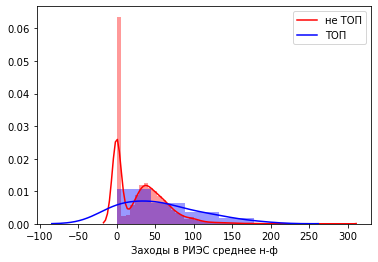

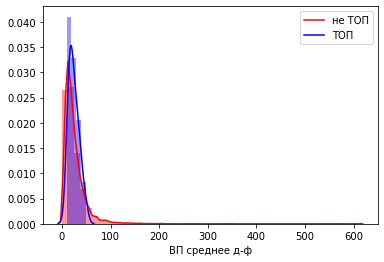

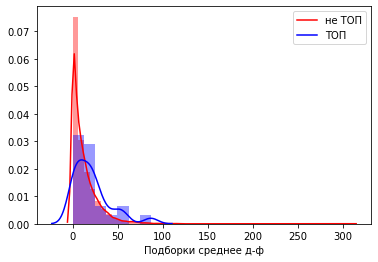

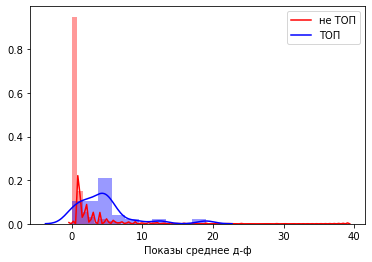

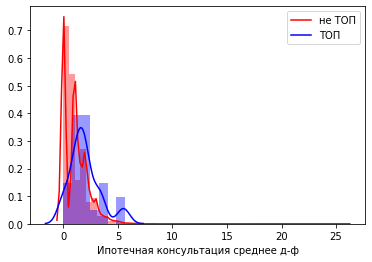

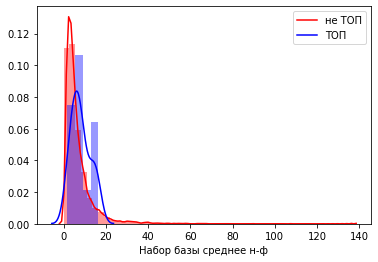

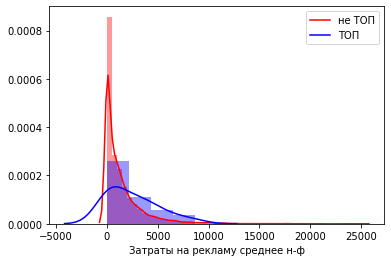

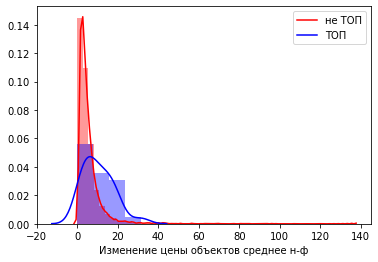

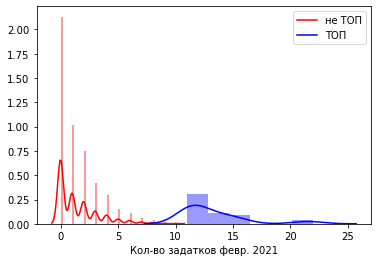

In [56]:
#построим гистограммы по средним величинам
for column in avg_value:
    sns.distplot(r.query('ТОП == 0')[column], kde_kws={"color": "r", "label": "не ТОП"}, hist_kws={"color": "r"}) 
    sns.distplot(r.query('ТОП == 1')[column], kde_kws={"color": "b", "label": "ТОП"}, hist_kws={"color": "b"}) 
    plt.show();

<a href = '#section1'>Вернуться к оглавлению</a>

### 3.3. Поиск корреляций <a id="step3.4">
- построим матрицу корреляций и отобразим её на тепловой карте

In [12]:
r1 = r.drop(['стаж', 
       'Заходы в РИЭС среднее н-ф', 'ВП среднее д-ф', 'Подборки среднее д-ф',
       'Показы среднее д-ф', 'Ипотечная консультация среднее д-ф', 
       'Набор базы среднее н-ф', 'Затраты на рекламу среднее н-ф',
       'Изменение цены объектов среднее н-ф', 'Кластер R по задаткам', 'ТОП'], 1)

In [13]:
#расчёт корреляций
cor = r1.corr()

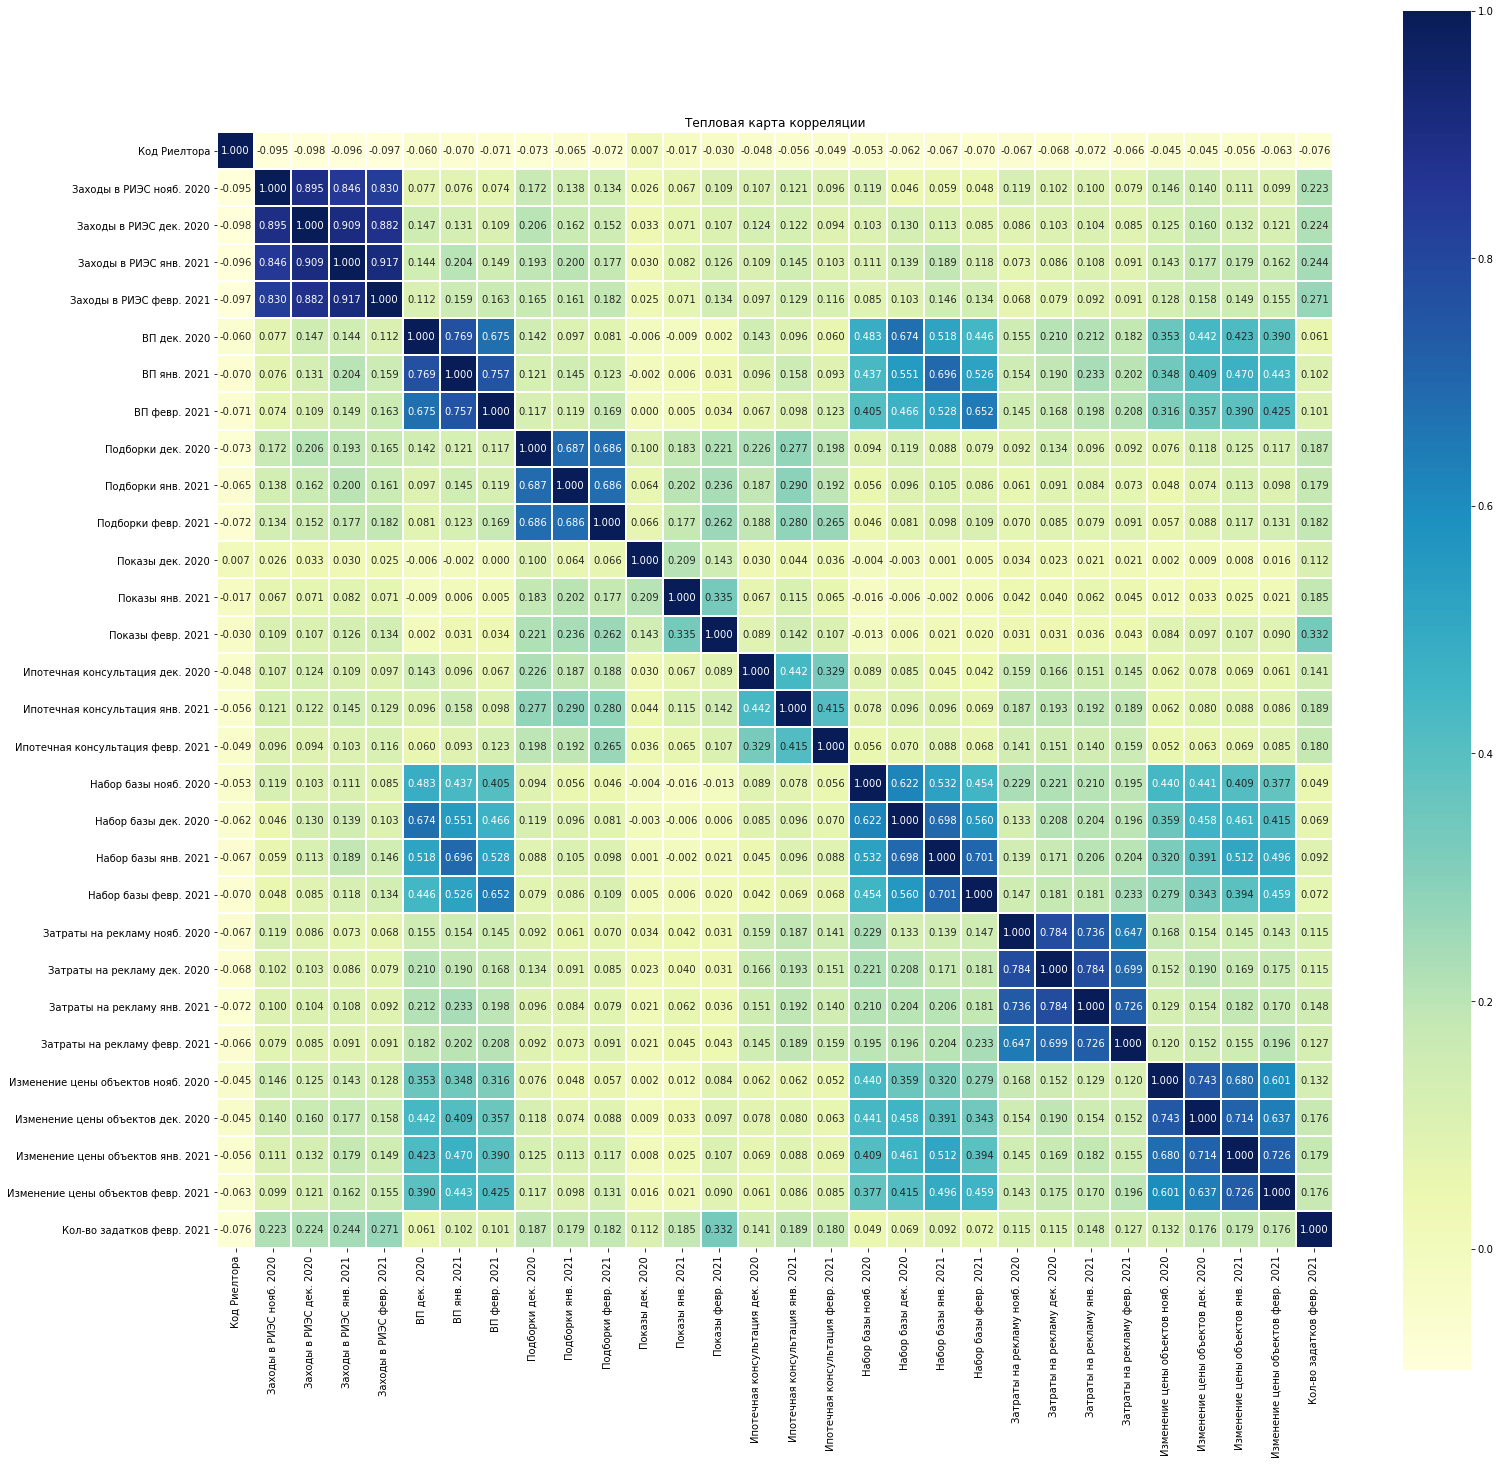

In [14]:
#нарисуем тепловую карту с подписями для матрицы корреляций
plt.figure(figsize=(25, 25))
plt.title('Тепловая карта корреляции')
sns.heatmap(cor, annot = True, square=True, cmap="YlGnBu", fmt='.3f', linewidths=1, linecolor='white');

<a href = '#section1'>Вернуться к оглавлению</a>

## Шаг 4. КЛАСТЕРИЗАЦИЯ РИЕЛТОРОВ<a id="step4"></a>
 
- Стандартизируем данные.
- Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму. 
Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.
- Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры риелторов.
- Посмотрим на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
- Построим распределения признаков для кластеров. Можно ли что-то заметить по ним?

In [15]:
#зададим вектор целевой переменной
y = r1['Кол-во задатков февр. 2021']

In [24]:
#Создадим матрица "объект-признак"
X = r1.drop((['ФИО риелтора' , 'город', 'МОП', 'Кол-во задатков февр. 2021']), axis =1)

В sklearn для стандартизации данных в модуле preprocessing есть готовый класс `StandardScaler()`

In [17]:
#импорт класса StandardScaler() из библиотеки sklearn
from sklearn.preprocessing import StandardScaler

#создаём объект класса scaler
scaler = StandardScaler() 

# стандартизируем данные
X_sc = scaler.fit_transform(X)

In [18]:
#импортируем классы модели кластеризации linkage() и dendrogram() из модуля для иерархической кластеризации hierarchy:
from scipy.cluster.hierarchy import dendrogram, linkage 

In [25]:
#передадим получившуюся стандартизированную таблицу в качестве параметра функции linkage(). 
#Чтобы диаграмма получилась показательной, лучше передать параметру method значение 'ward'
linked = linkage(X_sc, method = 'ward') 

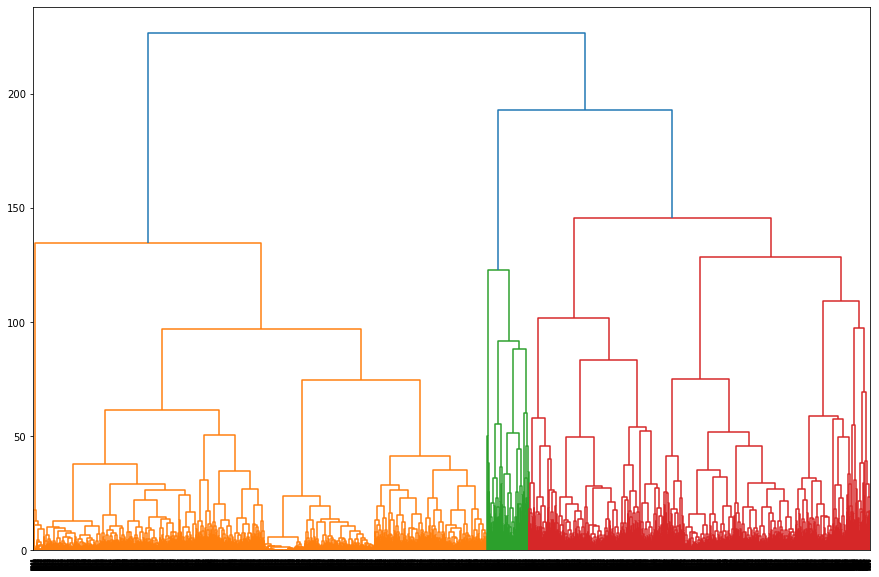

In [26]:
#В переменной linked сохранена таблица «связок» между объектами. Её можно визуализировать как дендрограмму:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Дендрограмма построена. Автоматически определилось 3 кластера (3 цвета)
Но опытныя путем выявлено, что 3 кластера недостаточно, я попробую разбить риелторов на 5 групп.

**K-Means (англ. «К средних»)**

K-Means группирует объекты пошагово. Алгоритм основан на предположении, что число кластеров (групп) заранее известно. Вот принцип работы пошагового алгоритма K-means:

1) Есть K кластеров. Алгоритм пошагово подбирает их центры и относит объекты к тому кластеру, чей центр ближе.

2) Центры корректируются (меняют своё положение) до тех пор, пока это позволяет минимизировать среднее расстояние от объектов каждого кластера до его центра.

3) Когда расстояние от объектов до центра перестаёт снижаться или сокращается несущественно, алгоритм останавливается и фиксирует разбиение, считая его оптимальным.

In [46]:
#импортируем алгоритм KMeans из модуля sklearn.cluster
from sklearn.cluster import KMeans

#задаём число кластеров, равное 5
km = KMeans(n_clusters = 5, random_state=0) 

#применим алгоритм к данным, сформируем вектор кластеров. В переменной labels сохраняются индексы предложенных алгоритмом групп 
labels = km.fit_predict(X_sc) 

In [47]:
#добавим столбец отметкой о принадлежности к кластеру в наш исходный датафрем gym
r['clusters'] = labels
display(r)

,Код Риелтора,ФИО риелтора,город,стаж,МОП,Заходы в РИЭС нояб. 2020,Заходы в РИЭС дек. 2020,Заходы в РИЭС янв. 2021,Заходы в РИЭС февр. 2021,Заходы в РИЭС среднее н-ф,ВП дек. 2020,ВП янв. 2021,ВП февр. 2021,ВП среднее д-ф,Подборки дек. 2020,Подборки янв. 2021,Подборки февр. 2021,Подборки среднее д-ф,Показы дек. 2020,Показы янв. 2021,Показы февр. 2021,Показы среднее д-ф,Ипотечная консультация дек. 2020,Ипотечная консультация янв. 2021,Ипотечная консультация февр. 2021,Ипотечная консультация среднее д-ф,Набор базы нояб. 2020,Набор базы дек. 2020,Набор базы янв. 2021,Набор базы февр. 2021,Набор базы среднее н-ф,Затраты на рекламу нояб. 2020,Затраты на рекламу дек. 2020,Затраты на рекламу янв. 2021,Затраты на рекламу февр. 2021,Затраты на рекламу среднее н-ф,Изменение цены объектов нояб. 2020,Изменение цены объектов дек. 2020,Изменение цены объектов янв. 2021,Изменение цены объектов февр. 2021,Изменение цены объектов среднее н-ф,Кол-во задатков февр. 2021,Кластер R по задаткам,ТОП,clusters
0,1232,Кремлев Владислав Юрьевич,Тюмень,NaN,Шарипов Фаниль Асхатович,155.0,111.0,139.0,104.0,127.25,30.0,56.0,23.0,36.333333,11.0,47.0,16.0,24.666667,0.0,4.0,4.0,4.0,0.0,1.0,2.0,1.5,10.0,13.0,22.0,7.0,13.00,49.0,705,221,0,243.75,22.0,20.0,11.0,10.0,15.75,22,№4: более 8,1,2
1,18930,Пушкина Виктория Ивановна,Тюмень,NaN,Фаттахов Артур Альбертович,0.0,0.0,0.0,0.0,0.00,39.0,10.0,14.0,21.000000,16.0,15.0,15.0,15.333333,0.0,0.0,2.0,2.0,2.0,0.0,1.0,1.5,6.0,23.0,1.0,2.0,8.00,3049.0,3275,4463,6488,4318.75,4.0,25.0,21.0,8.0,14.50,21,№4: более 8,1,0
2,14272,Ишкиев Ильнур Ильшатович,Тюмень,NaN,Ишкиев Ильнур Ильшатович,200.0,210.0,170.0,132.0,178.00,29.0,38.0,39.0,35.333333,8.0,8.0,1.0,5.666667,0.0,1.0,12.0,6.5,3.0,4.0,2.0,3.0,14.0,16.0,17.0,15.0,15.50,4445.0,4298,4809,4832,4596.00,20.0,12.0,26.0,11.0,17.25,16,№4: более 8,1,2
3,14888,Третьякова Екатерина Петровна,Тюмень,NaN,Каримова Ильсеяр Равильевна,0.0,0.0,0.0,0.0,0.00,14.0,13.0,21.0,16.000000,31.0,10.0,26.0,22.333333,5.0,0.0,13.0,9.0,2.0,0.0,2.0,2.0,7.0,2.0,6.0,7.0,5.50,1807.0,1438,3300,1611,2039.00,3.0,9.0,8.0,5.0,6.25,15,№4: более 8,1,4
4,22415,Замошникова Ольга Петровна,Нижний Тагил,NaN,Осинняя Татьяна Александровна,105.0,106.0,98.0,76.0,96.25,41.0,35.0,35.0,37.000000,11.0,23.0,21.0,18.333333,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,14.0,25.0,16.0,8.0,15.75,7315.0,5095,9850,6810,7267.50,16.0,8.0,36.0,4.0,16.00,15,№4: более 8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9081,1231218767,Лысых Вероника Викторовна,Белгород,NaN,0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0,0,0.00,0.0,0.0,0.0,0.0,0.00,0,№1: нет задатков,0,1
9082,1231218776,Шаталова Наталья Павловна,Тверь,NaN,Шаталова Наталья Павловна,0.0,0.0,0.0,0.0,0.00,5.0,4.0,5.0,4.666667,3.0,0.0,2.0,2.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.00,0.0,0,0,0,0.00,2.0,0.0,0.0,0.0,2.00,0,№1: нет задатков,0,1
9083,1231218795,Калугин Михаил Михайлович,Тверь,NaN,Калугин Михаил Михайлович,67.0,43.0,46.0,42.0,49.50,0.0,1.0,0.0,1.000000,2.0,1.0,1.0,1.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0,0,0.00,0.0,0.0,0.0,0.0,0.00,0,№1: нет задатков,0,1
9084,1231218918,Валитов Булат Мусаевич,Новая Уфа,NaN,Лебедь Кристина Владиславовна,10.0,28.0,23.0,28.0,22.25,19.0,17.0,13.0,16.333333,0.0,0.0,6.0,6.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,4.0,1.0,4.00,0.0,0,0,0,0.00,2.0,5.0,1.0,5.0,3.25,0,№1: нет задатков,0,1


### ВЫВОД

Кластеры риелторов спрогнозированы. Столбец с отметкой о принадлежности к кластеру добавлен в исходный датасет 

Далее можно посмотреть на средние значения признаков в разбивке по кластерам, поискать особенности и закономерности.

Посмотрим визуально, как распределились признаки по кластерам: 

- построим боксплоты для количественных переменных и бар-чарты для категориальных; 
- для каждой переменной покажем 1 график, на котором разными цветами отобразим результаты для каждого из кластеров. 

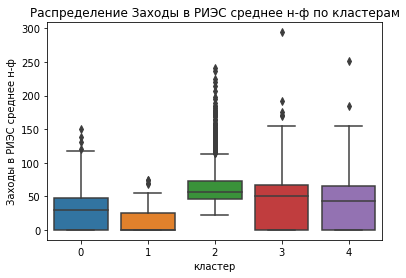

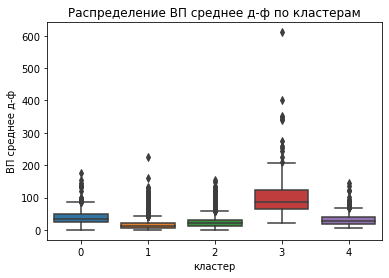

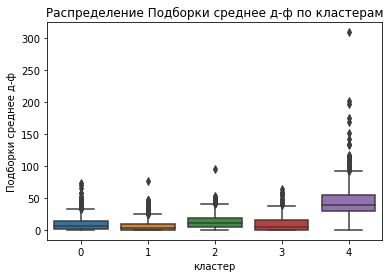

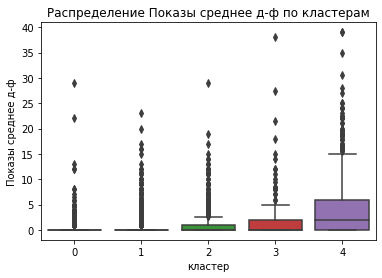

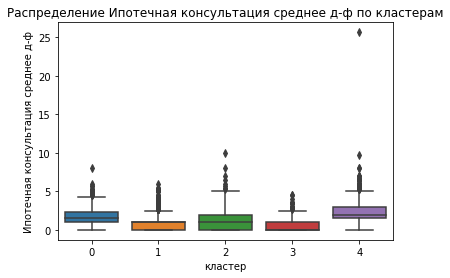

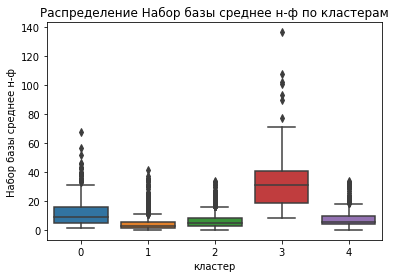

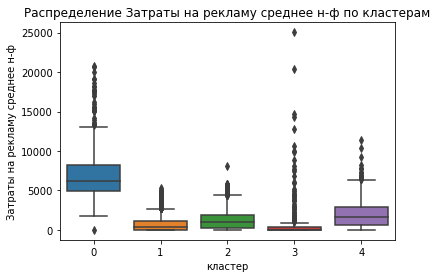

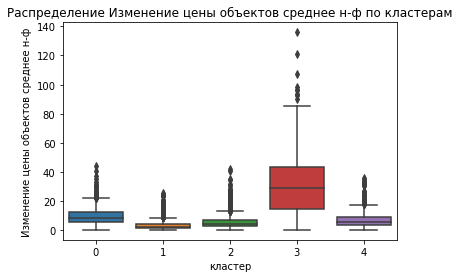

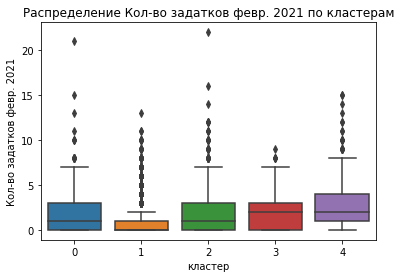

In [57]:
#построим боксплоты для средних величин
for column in avg_value:
    sns.boxplot(x = 'clusters', y = column, data = r)
    plt.xlabel('кластер')
    plt.ylabel(column)
    plt.title('Распределение {} по кластерам'.format(column)) 
    plt.show();

In [58]:
r.groupby(['clusters']).median().round(2).T

clusters,0,1,2,3,4
Код Риелтора,46253.50,46383.00,45356.50,53842.00,49786.00
стаж,NaN,NaN,NaN,NaN,NaN
Заходы в РИЭС нояб. 2020,32.00,0.00,65.00,43.00,41.00
Заходы в РИЭС дек. 2020,32.00,0.00,63.00,51.00,47.00
Заходы в РИЭС янв. 2021,25.00,0.00,54.00,49.00,40.00
Заходы в РИЭС февр. 2021,22.00,0.00,44.00,42.00,32.00
Заходы в РИЭС среднее н-ф,29.75,0.00,56.75,50.50,43.00
ВП дек. 2020,35.00,12.00,20.00,97.00,28.00
ВП янв. 2021,36.00,12.00,22.00,88.00,31.00
ВП февр. 2021,27.00,10.00,17.00,72.00,24.00


In [54]:
r.to_excel("output.xlsx")